In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, InputLayer, Conv2D, Activation, LeakyReLU, Concatenate, Dense, Lambda , MaxPooling2D , UpSampling2D , Conv2DTranspose, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MSE
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
import datetime
import time
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from tensorflow.keras import models, layers, optimizers, losses
from tensorflow.python.keras.saving import hdf5_format
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
import h5py, itertools, collections
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
physical_devices = tf.config.list_physical_devices('GPU')
import tensorflow as tf

In [ ]:
def datagenerator(images, labels, batchsize, mode="train"):
    while True:
        start = 0
        end = batchsize

        while start  < len(images): 
            # load your images from numpy arrays or read from directory
            x = images[start:end] 
            y = labels[start:end]
            yield x, y

            start += batchsize
            end += batchsize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Documents/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
#################
# Verifications:
#################
print('GPU is used.' if len(tf.test.gpu_device_name()) > 0 else 'GPU is NOT used.')
print("Tensorflow version: " + tf.__version__)
'''
    Split train and validation.
'''

# We define the size of input images to 128x128 pixels.
image_size = (160, 160)
# We define the batch size
batch_size = 16
# Create an image generator with a fraction of images reserved for validation:
image_generator = ImageDataGenerator(validation_split=0.1,
                                     horizontal_flip = True,
                                     vertical_flip = False,
                                     )
# Now, we create a training data iterator by creating batchs of images of the same size as
# defined previously, i.e., each image is resized in a 64x64 pixels format.
train_ds =  DirectoryIterator(
    "/content/autism/train",
    image_generator,
    class_mode='categorical',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    subset = 'training',
)
# Similarly, we create a validation data iterator by creating batchs of images of the same size as
# defined previously, i.e., each image is resized in a 64x64 pixels format.
val_ds = DirectoryIterator(
    "/content/autism/valid",
    image_generator,
    class_mode='categorical',
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    subset = 'validation',
    shuffle=False
)

test_ds = DirectoryIterator(
    "/content/autism/test",
    image_generator,
    class_mode='categorical',
    seed=1337,
    target_size=image_size,
    subset = 'validation',
    shuffle=False
)

# We save the list of classes (labels).
class_names = list(train_ds.class_indices.keys())
print (class_names)
# We also save the number of labels.
num_classes = train_ds.num_classes
x,y =next(test_ds)
print(y.shape)

GPU is NOT used.
Tensorflow version: 2.6.0
Found 2286 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
['autistic', 'non_autistic']
(20, 2)


In [ ]:
tf.keras.applications.mobilenet.preprocess_input 

<function keras.applications.mobilenet.preprocess_input>

In [ ]:
len(test_ds)

1

In [ ]:
batch_size = 64
# train_gen2 = ImageDataGenerator(rescale=1./255).flow_from_directory("/content/autism/train", target_size=(224,224), batch_size=batch_size)# Import the Original Validation Dataset
# val_gen2 = ImageDataGenerator(rescale=1./255).flow_from_directory("/content/autism/valid", target_size=(224,224), batch_size=batch_size)
test_gen2 = ImageDataGenerator().flow_from_directory("/content/autism/test", target_size=(224,224), batch_size=200)


Found 200 images belonging to 2 classes.


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


(16, 160, 160, 3)


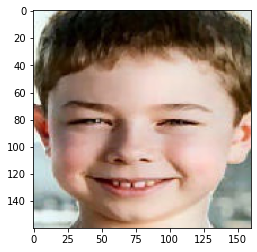

In [ ]:
x,y =next(train_ds)
print (x.shape)
plt.imshow(x[2]/255)

In [ ]:
## new dataget
def datagen(train_ds):
  while True:
    x,y =next(train_ds)
    yield ([x,y],y)


def val_datagen(val_ds):
  while True:
    x,y =next(val_ds)
    yield ([x,y],y)

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
total_train = train_ds.n
total_val = val_ds.n
img_shape=(224,224,3)
covn_base = tf.keras.applications.MobileNet(weights='imagenet',input_shape=img_shape,include_top=False)
covn_base.trainable = True
# for layers in covn_base.layers[:-5]:
#     layers.trainable = False
    
#Build model    
# model = tf.keras.Sequential()
x = covn_base.output
# x = Dense(32,activation='leakyrelu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
x = Dense(128,activation='relu')(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
x = Dense(16,activation='relu')(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
# x = Dropout(rate=0.4,seed = 123)(x) 
output = tf.keras.layers.Dense(2,activation='softmax')(x) #Join the output layer (2 categories)
model=Model(inputs = covn_base.input, outputs = output)
#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  #Use adam optimizer, the learning rate is 0.0001
              loss='binary_crossentropy', #Cross entropy loss function
              metrics=["accuracy"]) 

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
covn_base.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fe0f3a77510>>

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,write_steps_per_second = )

In [ ]:
epochs = 15
history = model.fit(x=train_ds,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_ds,
                    validation_steps=total_val // batch_size,callbacks=[tensorboard_callback])

Epoch 1/15
142/142 [==============================] - 209s 1s/step - loss: 0.5262 - accuracy: 0.7617 - val_loss: 0.5469 - val_accuracy: 0.7500
Epoch 2/15
142/142 [==============================] - 209s 1s/step - loss: 0.3550 - accuracy: 0.8605 - val_loss: 0.3752 - val_accuracy: 0.8750
Epoch 3/15
142/142 [==============================] - 209s 1s/step - loss: 0.2721 - accuracy: 0.9115 - val_loss: 0.3806 - val_accuracy: 0.8750
Epoch 4/15
142/142 [==============================] - 209s 1s/step - loss: 0.2139 - accuracy: 0.9344 - val_loss: 0.4149 - val_accuracy: 0.8750
Epoch 5/15
142/142 [==============================] - 208s 1s/step - loss: 0.1835 - accuracy: 0.9511 - val_loss: 0.5254 - val_accuracy: 0.7500
Epoch 6/15
142/142 [==============================] - 207s 1s/step - loss: 0.1537 - accuracy: 0.9652 - val_loss: 0.2390 - val_accuracy: 0.8750
Epoch 7/15
142/142 [==============================] - 209s 1s/step - loss: 0.1257 - accuracy: 0.9727 - val_loss: 0.4923 - val_accuracy: 0.8125

In [ ]:
tensorboard --logdir=

SyntaxError: ignored

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
total_train = train_ds.n
total_val = val_ds.n
img_shape=(224,224,3)
covn_base = tf.keras.applications.MobileNet(weights='imagenet',input_shape=img_shape,include_top=False)
covn_base.trainable = True
# for layers in covn_base.layers[:-5]:
#     layers.trainable = False
    
#Build model    
# model = tf.keras.Sequential()
x = covn_base.output
# x = Dense(32,activation='leakyrelu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(rate=0.4,seed = 123)(x) 
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
x = Dense(128,activation='relu')(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
x = Dense(16,activation='relu')(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
# x = Dropout(rate=0.4,seed = 123)(x) 
output = tf.keras.layers.Dense(2,activation='softmax')(x) #Join the output layer (2 categories)
model=Model(inputs = covn_base.input, outputs = output)
#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  #Use adam optimizer, the learning rate is 0.0001
              loss='_crossentropy', #Cross entropy loss function
              metrics=["accuracy"]) 

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
epochs = 15
history = model.fit(x=train_ds,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_ds,
                    validation_steps=total_val // batch_size)

Epoch 1/15
142/142 [==============================] - 259s 2s/step - loss: 0.5928 - accuracy: 0.7225 - val_loss: 1.0133 - val_accuracy: 0.5625
Epoch 2/15
142/142 [==============================] - 252s 2s/step - loss: 0.3456 - accuracy: 0.8392 - val_loss: 0.4462 - val_accuracy: 0.8125
Epoch 3/15
142/142 [==============================] - 251s 2s/step - loss: 0.2605 - accuracy: 0.8921 - val_loss: 0.4017 - val_accuracy: 0.8750
Epoch 4/15
142/142 [==============================] - 251s 2s/step - loss: 0.2011 - accuracy: 0.9242 - val_loss: 0.3475 - val_accuracy: 0.7500
Epoch 5/15
142/142 [==============================] - 252s 2s/step - loss: 0.1689 - accuracy: 0.9405 - val_loss: 0.3477 - val_accuracy: 0.8750
Epoch 6/15
142/142 [==============================] - 253s 2s/step - loss: 0.1507 - accuracy: 0.9502 - val_loss: 0.4927 - val_accuracy: 0.8125
Epoch 7/15
142/142 [==============================] - 253s 2s/step - loss: 0.1097 - accuracy: 0.9692 - val_loss: 0.2443 - val_accuracy: 0.8750

In [18]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from keras.layers import Layer
from keras import regularizers
total_train = train_ds.n
total_val = val_ds.n
img_shape=(224,224,3)
covn_base = tf.keras.applications.MobileNet(weights='imagenet',input_shape=img_shape,include_top=False)
covn_base.trainable = True
# for layers in covn_base.layers[:-5]:
#     layers.trainable = False
    
#Build model    
# model = tf.keras.Sequential()
x = covn_base.output
# x = Dense(32,activation='leakyrelu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(rate=0.4,seed = 123)(x) 
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
x = Dense(128,activation='relu')(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
x = Dense(16,activation='relu')(x)
x=keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001 )(x)
# x = Dropout(rate=0.4,seed = 123)(x) 
output = tf.keras.layers.Dense(2,activation='softmax')(x) #Join the output layer (2 categories)
model=Model(inputs = covn_base.input, outputs = output)
#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  #Use adam optimizer, the learning rate is 0.0001
              loss='categorical_crossentropy', #Cross entropy loss function
              metrics=["accuracy",tf.keras.metrics.AUC()]) 

In [ ]:
epochs = 15
history = model.fit(x=train_ds,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_ds,
                    validation_steps=total_val // batch_size)

Epoch 1/15
142/142 [==============================] - 230s 2s/step - loss: 0.6065 - accuracy: 0.6881 - auc: 0.7647 - val_loss: 0.7723 - val_accuracy: 0.5625 - val_auc: 0.6602
Epoch 2/15
142/142 [==============================] - 222s 2s/step - loss: 0.4486 - accuracy: 0.7855 - auc: 0.8747 - val_loss: 0.4369 - val_accuracy: 0.8125 - val_auc: 0.8438
Epoch 3/15
142/142 [==============================] - 223s 2s/step - loss: 0.3630 - accuracy: 0.8383 - auc: 0.9184 - val_loss: 0.3826 - val_accuracy: 0.8125 - val_auc: 0.8828
Epoch 4/15
142/142 [==============================] - 223s 2s/step - loss: 0.2891 - accuracy: 0.8828 - auc: 0.9508 - val_loss: 0.4778 - val_accuracy: 0.8125 - val_auc: 0.8516
Epoch 5/15
142/142 [==============================] - 220s 2s/step - loss: 0.2669 - accuracy: 0.8868 - auc: 0.9583 - val_loss: 0.4266 - val_accuracy: 0.8125 - val_auc: 0.8926
Epoch 6/15
142/142 [==============================] - 221s 2s/step - loss: 0.2247 - accuracy: 0.9110 - auc: 0.9720 - val_loss

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(test_ds)

In [ ]:
y_pred_keras

array([[1.34536764e-03, 9.98654604e-01],
       [7.41556704e-01, 2.58443296e-01],
       [1.80443027e-03, 9.98195589e-01],
       [6.75234497e-02, 9.32476580e-01],
       [6.50802627e-02, 9.34919655e-01],
       [9.86849070e-01, 1.31509425e-02],
       [9.97696817e-01, 2.30322452e-03],
       [5.28014004e-01, 4.71985996e-01],
       [3.77955996e-02, 9.62204456e-01],
       [9.45803046e-01, 5.41969575e-02],
       [3.36589515e-02, 9.66341078e-01],
       [5.34130784e-04, 9.99465883e-01],
       [3.61785013e-03, 9.96382117e-01],
       [3.76426469e-04, 9.99623537e-01],
       [8.30382865e-04, 9.99169588e-01],
       [2.27775514e-01, 7.72224486e-01],
       [5.33468928e-03, 9.94665265e-01],
       [6.55813841e-04, 9.99344170e-01],
       [9.38119233e-01, 6.18807189e-02],
       [6.76780066e-04, 9.99323249e-01]], dtype=float32)

(20, 160, 160, 3)
[1. 0.]


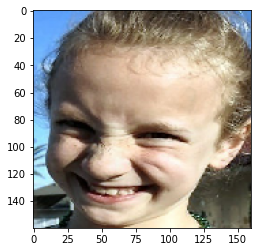

In [ ]:
x,y =next(test_ds)
print (x.shape)
plt.imshow(x[1]/255)
print(y[3])

In [ ]:
epochs = 15
history = model.fit(x=train_ds,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_ds,
                    validation_steps=total_val // batch_size)

Epoch 1/15
142/142 [==============================] - 221s 2s/step - loss: 0.6364 - accuracy: 0.6938 - auc_2: 0.7680 - val_loss: 1.2496 - val_accuracy: 0.5000 - val_auc_2: 0.6094
Epoch 2/15
142/142 [==============================] - 216s 2s/step - loss: 0.4185 - accuracy: 0.8031 - auc_2: 0.8924 - val_loss: 0.4302 - val_accuracy: 0.8125 - val_auc_2: 0.8789
Epoch 3/15
142/142 [==============================] - 216s 2s/step - loss: 0.3453 - accuracy: 0.8537 - auc_2: 0.9264 - val_loss: 0.2798 - val_accuracy: 0.8750 - val_auc_2: 0.9531
Epoch 4/15
142/142 [==============================] - 215s 2s/step - loss: 0.2991 - accuracy: 0.8714 - auc_2: 0.9456 - val_loss: 0.3497 - val_accuracy: 0.8750 - val_auc_2: 0.9219
Epoch 5/15
142/142 [==============================] - 214s 2s/step - loss: 0.2739 - accuracy: 0.8881 - auc_2: 0.9546 - val_loss: 0.1682 - val_accuracy: 0.9375 - val_auc_2: 0.9883
Epoch 6/15
142/142 [==============================] - 215s 2s/step - loss: 0.2283 - accuracy: 0.9106 - au

In [ ]:

# model.save('autism')
model.save('autism_1.h5')

In [ ]:
model.save('a_11')

INFO:tensorflow:Assets written to: a_11/assets


In [ ]:
model = tf.saved_model.load('/content/a_11')

In [ ]:
def center_crop(img, dim):
  img =cv2.resize(img,(0,0) ,fx =0.9,fy =0.9)
  width, height = img.shape[1], img.shape[0]
  crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
  crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
  mid_x, mid_y = int(width/2), int(height/2)
  cw2, ch2 = int(crop_width/2), int(crop_height/2)
  crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
  return crop_img

In [ ]:
import cv2
image = cv2.imread('/content/difference-between-cerebral-palsy-and-autism.jpeg')
im = center_crop(image,(224,224))

In [ ]:
image = np.reshape(im,(1,224,224,3))

In [ ]:
new_model = tf.keras.models.load_model('/content/a_11')

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
new_model.predict(image)

array([[0.99347323, 0.00652676]], dtype=float32)

In [ ]:
new_model.evaluate(test_gen2)

1/1 [==============================] - 8s 8s/step - loss: 0.6074 - accuracy: 0.7600 - auc_2: 0.8717


[0.607361912727356, 0.7599999904632568, 0.8717250227928162]

In [ ]:
new_model = tf.keras.models.load_model('/content/autism_1.h5')